In [172]:
import numpy as np
m = 50 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 4*(x**2) + 3*x + 2 + 2*np.random.randn(m,1)

In [173]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)
print(x[:3])
print(y[:3])

<class 'numpy.ndarray'> 2 (50, 1) <class 'numpy.ndarray'> 2 (50, 1)
[[-0.0780988 ]
 [ 1.01001115]
 [ 1.03274961]]
[[ 2.24555924]
 [10.90555089]
 [14.47796275]]


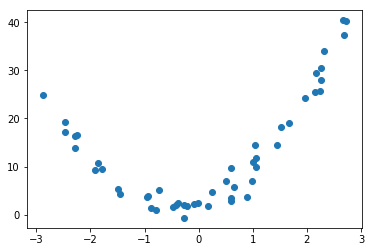

In [174]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [188]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(40, 1) (40, 1) (10, 1) (10, 1)


In [189]:
# let's plot a linear regression and a polynomial regression on this, and 
# compare fits on the entire training data


In [190]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[11.21553649] [[3.34311718]]


Mean Squared Error on Test:  152.90202783460367


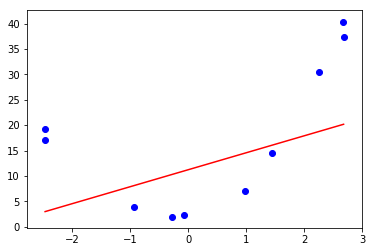

In [191]:
#this block of code plots the predicted values as a red line
#and the actual values as a scatter plot, along with the 
#mean squared error
# re-use this as needed 

y_predict = lin_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
xs = x_test[order]
ys = y_predict[order]
plt.plot(xs,ys,"r-")
plt.scatter(x_test, y_test, color='blue')
plt.show()


In [198]:
# let's add polynomial features of degree num_degrees (modify this and play around
# with this block of code and the next. what do you find?

from sklearn.preprocessing import PolynomialFeatures
num_degrees = 2
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[-0.0780988] [-0.0780988   0.00609942]
(50, 1) (50, 2)


[2.21233749] [[3.19031372 3.94439062]]
Mean Squared Error on Test:  3.7587943520784526


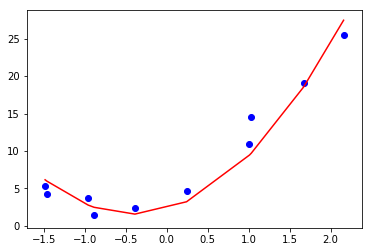

In [199]:

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

In [200]:
# In class work. repeat the above analyses for different polynomials, different
# train-test splits. work in groups of 2 and present in class

Mean Squared Error on Test:  3.802975270684717
[2.43494342] [3.01006706 3.87484411]


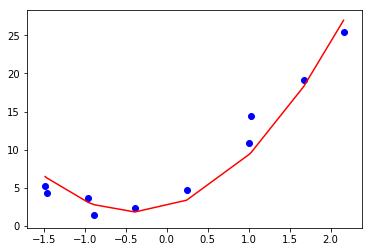

In [201]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

plt.plot(xs,y_predict,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()


In [ ]:
# CLASS WORK. Play around with this code to see if you can construct scenarios here where
# lass regression helps in fitting a better model
